In [1]:
import pandas as pd
import pickle
import numpy as np

In [2]:
df = pickle.load(open('dataset_level2.pkl','rb'))


In [3]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
0,2,Australia,Sri Lanka,0.1,0,0,NaN,Melbourne Cricket Ground
1,2,Australia,Sri Lanka,0.2,0,0,NaN,Melbourne Cricket Ground
2,2,Australia,Sri Lanka,0.3,1,0,NaN,Melbourne Cricket Ground
3,2,Australia,Sri Lanka,0.4,2,0,NaN,Melbourne Cricket Ground
4,2,Australia,Sri Lanka,0.5,0,0,NaN,Melbourne Cricket Ground
...,...,...,...,...,...,...,...,...
115320,964,Sri Lanka,Australia,19.3,1,0,Colombo,R Premadasa Stadium
115321,964,Sri Lanka,Australia,19.4,0,0,Colombo,R Premadasa Stadium
115322,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,R Premadasa Stadium
115323,964,Sri Lanka,Australia,19.6,2,0,Colombo,R Premadasa Stadium


In [4]:
df.isnull().sum()

match_id               0
batting_team           0
bowling_team           0
ball                   0
runs                   0
player_dismissed       0
city                8548
venue                  0
dtype: int64

In [5]:
df[df['city'].isnull()]['venue'].value_counts()


venue
Dubai International Cricket Stadium        2969
Pallekele International Cricket Stadium    2066
Melbourne Cricket Ground                   1453
Sydney Cricket Ground                       749
Adelaide Oval                               498
Harare Sports Club                          372
Sharjah Cricket Stadium                     249
Sylhet International Cricket Stadium        128
Carrara Oval                                 64
Name: count, dtype: int64

In [6]:
cities = np.where(df['city'].isnull(),df['venue'].str.split().apply(lambda x:x[0]),df['city'])


In [7]:
df['city'] = cities


In [8]:
df.isnull().sum()


match_id            0
batting_team        0
bowling_team        0
ball                0
runs                0
player_dismissed    0
city                0
venue               0
dtype: int64

In [9]:
df.drop(columns=['venue'],inplace=True)

In [10]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne
...,...,...,...,...,...,...,...
115320,964,Sri Lanka,Australia,19.3,1,0,Colombo
115321,964,Sri Lanka,Australia,19.4,0,0,Colombo
115322,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo
115323,964,Sri Lanka,Australia,19.6,2,0,Colombo


In [11]:
eligible_cities = df['city'].value_counts()[df['city'].value_counts() > 600].index.tolist()


In [12]:
df = df[df['city'].isin(eligible_cities)]


In [13]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne
...,...,...,...,...,...,...,...
115320,964,Sri Lanka,Australia,19.3,1,0,Colombo
115321,964,Sri Lanka,Australia,19.4,0,0,Colombo
115322,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo
115323,964,Sri Lanka,Australia,19.6,2,0,Colombo


In [14]:
df.loc[:, 'runs'] = pd.to_numeric(df['runs'], errors='coerce')
df['current_score'] = df.groupby('match_id')['runs'].cumsum()

C:\Users\ashish\AppData\Local\Temp\ipykernel_22192\3971916432.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['current_score'] = df.groupby('match_id')['runs'].cumsum()


In [15]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3
...,...,...,...,...,...,...,...,...
115320,964,Sri Lanka,Australia,19.3,1,0,Colombo,125
115321,964,Sri Lanka,Australia,19.4,0,0,Colombo,125
115322,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,125
115323,964,Sri Lanka,Australia,19.6,2,0,Colombo,127


In [16]:
df['over'] = df['ball'].apply(lambda x:str(x).split(".")[0])
df['ball_no'] = df['ball'].apply(lambda x:str(x).split(".")[1])
df

C:\Users\ashish\AppData\Local\Temp\ipykernel_22192\2777558413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['over'] = df['ball'].apply(lambda x:str(x).split(".")[0])
C:\Users\ashish\AppData\Local\Temp\ipykernel_22192\2777558413.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ball_no'] = df['ball'].apply(lambda x:str(x).split(".")[1])


,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5
...,...,...,...,...,...,...,...,...,...,...
115320,964,Sri Lanka,Australia,19.3,1,0,Colombo,125,19,3
115321,964,Sri Lanka,Australia,19.4,0,0,Colombo,125,19,4
115322,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,125,19,5
115323,964,Sri Lanka,Australia,19.6,2,0,Colombo,127,19,6


In [17]:
df['balls_bowled'] = (df['over'].astype('int')*6) + df['ball_no'].astype('int')
df


C:\Users\ashish\AppData\Local\Temp\ipykernel_22192\4058181551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['balls_bowled'] = (df['over'].astype('int')*6) + df['ball_no'].astype('int')


,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5
...,...,...,...,...,...,...,...,...,...,...,...
115320,964,Sri Lanka,Australia,19.3,1,0,Colombo,125,19,3,117
115321,964,Sri Lanka,Australia,19.4,0,0,Colombo,125,19,4,118
115322,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,125,19,5,119
115323,964,Sri Lanka,Australia,19.6,2,0,Colombo,127,19,6,120


In [18]:
df['balls_left'] = 120 - df['balls_bowled']
df['balls_left'] = df['balls_left'].apply(lambda x:0 if x<0 else x)
df

C:\Users\ashish\AppData\Local\Temp\ipykernel_22192\2304996896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['balls_left'] = 120 - df['balls_bowled']
C:\Users\ashish\AppData\Local\Temp\ipykernel_22192\2304996896.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['balls_left'] = df['balls_left'].apply(lambda x:0 if x<0 else x)


,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115
...,...,...,...,...,...,...,...,...,...,...,...,...
115320,964,Sri Lanka,Australia,19.3,1,0,Colombo,125,19,3,117,3
115321,964,Sri Lanka,Australia,19.4,0,0,Colombo,125,19,4,118,2
115322,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,125,19,5,119,1
115323,964,Sri Lanka,Australia,19.6,2,0,Colombo,127,19,6,120,0


In [19]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115
...,...,...,...,...,...,...,...,...,...,...,...,...
115320,964,Sri Lanka,Australia,19.3,1,0,Colombo,125,19,3,117,3
115321,964,Sri Lanka,Australia,19.4,0,0,Colombo,125,19,4,118,2
115322,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,125,19,5,119,1
115323,964,Sri Lanka,Australia,19.6,2,0,Colombo,127,19,6,120,0


In [20]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115
...,...,...,...,...,...,...,...,...,...,...,...,...
115320,964,Sri Lanka,Australia,19.3,1,0,Colombo,125,19,3,117,3
115321,964,Sri Lanka,Australia,19.4,0,0,Colombo,125,19,4,118,2
115322,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,125,19,5,119,1
115323,964,Sri Lanka,Australia,19.6,2,0,Colombo,127,19,6,120,0


In [21]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115
...,...,...,...,...,...,...,...,...,...,...,...,...
115320,964,Sri Lanka,Australia,19.3,1,0,Colombo,125,19,3,117,3
115321,964,Sri Lanka,Australia,19.4,0,0,Colombo,125,19,4,118,2
115322,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,125,19,5,119,1
115323,964,Sri Lanka,Australia,19.6,2,0,Colombo,127,19,6,120,0


In [22]:
df.loc[:, 'player_dismissed'] = df['player_dismissed'].apply(lambda x: 0 if x == '0' else 1)

# Display the DataFrame
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115
...,...,...,...,...,...,...,...,...,...,...,...,...
115320,964,Sri Lanka,Australia,19.3,1,0,Colombo,125,19,3,117,3
115321,964,Sri Lanka,Australia,19.4,0,0,Colombo,125,19,4,118,2
115322,964,Sri Lanka,Australia,19.5,0,1,Colombo,125,19,5,119,1
115323,964,Sri Lanka,Australia,19.6,2,0,Colombo,127,19,6,120,0


In [23]:
df['player_dismissed'] = df['player_dismissed'].astype('int')
df

C:\Users\ashish\AppData\Local\Temp\ipykernel_22192\2937176773.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['player_dismissed'] = df['player_dismissed'].astype('int')


,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115
...,...,...,...,...,...,...,...,...,...,...,...,...
115320,964,Sri Lanka,Australia,19.3,1,0,Colombo,125,19,3,117,3
115321,964,Sri Lanka,Australia,19.4,0,0,Colombo,125,19,4,118,2
115322,964,Sri Lanka,Australia,19.5,0,1,Colombo,125,19,5,119,1
115323,964,Sri Lanka,Australia,19.6,2,0,Colombo,127,19,6,120,0


In [24]:
df['player_dismissed'] = df.groupby('match_id')['player_dismissed'].transform(lambda x: x.cumsum() if x.any() else x)

# Display the DataFrame
df

C:\Users\ashish\AppData\Local\Temp\ipykernel_22192\303895889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['player_dismissed'] = df.groupby('match_id')['player_dismissed'].transform(lambda x: x.cumsum() if x.any() else x)


,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115
...,...,...,...,...,...,...,...,...,...,...,...,...
115320,964,Sri Lanka,Australia,19.3,1,8,Colombo,125,19,3,117,3
115321,964,Sri Lanka,Australia,19.4,0,8,Colombo,125,19,4,118,2
115322,964,Sri Lanka,Australia,19.5,0,9,Colombo,125,19,5,119,1
115323,964,Sri Lanka,Australia,19.6,2,9,Colombo,127,19,6,120,0


In [25]:
df['wickets_left'] = 10 - df['player_dismissed']
df

C:\Users\ashish\AppData\Local\Temp\ipykernel_22192\3312475190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wickets_left'] = 10 - df['player_dismissed']


,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left,wickets_left
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119,10
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118,10
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117,10
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116,10
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115320,964,Sri Lanka,Australia,19.3,1,8,Colombo,125,19,3,117,3,2
115321,964,Sri Lanka,Australia,19.4,0,8,Colombo,125,19,4,118,2,2
115322,964,Sri Lanka,Australia,19.5,0,9,Colombo,125,19,5,119,1,1
115323,964,Sri Lanka,Australia,19.6,2,9,Colombo,127,19,6,120,0,1


In [26]:
df['crr'] = (df['current_score']*6)/df['balls_bowled']

C:\Users\ashish\AppData\Local\Temp\ipykernel_22192\914577034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['crr'] = (df['current_score']*6)/df['balls_bowled']


In [27]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left,wickets_left,crr
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119,10,0.000000
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118,10,0.000000
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117,10,2.000000
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116,10,4.500000
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115,10,3.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115320,964,Sri Lanka,Australia,19.3,1,8,Colombo,125,19,3,117,3,2,6.410256
115321,964,Sri Lanka,Australia,19.4,0,8,Colombo,125,19,4,118,2,2,6.355932
115322,964,Sri Lanka,Australia,19.5,0,9,Colombo,125,19,5,119,1,1,6.302521
115323,964,Sri Lanka,Australia,19.6,2,9,Colombo,127,19,6,120,0,1,6.350000


In [28]:
df['runs'] = pd.to_numeric(df['runs'], errors='coerce')

# Group by 'match_id'
groups = df.groupby('match_id')

# Initialize an empty list to store the results
last_five = []

# Iterate through each match_id
for match_id, group_df in groups:
    # Calculate the rolling sum of the last 30 rows in the 'runs' column
    rolling_sum = group_df['runs'].rolling(window=30, min_periods=1).sum()
    
    # Add the rolling sum values to the list
    last_five.extend(rolling_sum.values.tolist())


C:\Users\ashish\AppData\Local\Temp\ipykernel_22192\2111310673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['runs'] = pd.to_numeric(df['runs'], errors='coerce')


In [29]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left,wickets_left,crr
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119,10,0.000000
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118,10,0.000000
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117,10,2.000000
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116,10,4.500000
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115,10,3.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115320,964,Sri Lanka,Australia,19.3,1,8,Colombo,125,19,3,117,3,2,6.410256
115321,964,Sri Lanka,Australia,19.4,0,8,Colombo,125,19,4,118,2,2,6.355932
115322,964,Sri Lanka,Australia,19.5,0,9,Colombo,125,19,5,119,1,1,6.302521
115323,964,Sri Lanka,Australia,19.6,2,9,Colombo,127,19,6,120,0,1,6.350000


In [30]:
df['last_five'] = last_five

C:\Users\ashish\AppData\Local\Temp\ipykernel_22192\1595651733.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['last_five'] = last_five


In [31]:
final_df = df.groupby('match_id').sum()['runs'].reset_index().merge(df,on='match_id')

In [32]:
final_df=final_df[['batting_team','bowling_team','city','current_score','balls_left','wickets_left','crr','last_five','runs_x']]


In [33]:
final_df.dropna(inplace=True)


In [34]:
final_df.isnull().sum()


batting_team     0
bowling_team     0
city             0
current_score    0
balls_left       0
wickets_left     0
crr              0
last_five        0
runs_x           0
dtype: int64

In [35]:
data_types = final_df.dtypes
print(data_types)

batting_team      object
bowling_team      object
city              object
current_score      int64
balls_left         int64
wickets_left       int32
crr              float64
last_five        float64
runs_x             int64
dtype: object


In [36]:
unique_counts = final_df.nunique()
print(unique_counts)

batting_team       10
bowling_team       10
city               35
current_score     253
balls_left        120
wickets_left       11
crr              5645
last_five          88
runs_x            137
dtype: int64


In [37]:
minimum_values = final_df.min()
print(minimum_values)

batting_team     Afghanistan
bowling_team     Afghanistan
city               Abu Dhabi
current_score              0
balls_left                 0
wickets_left               0
crr                      0.0
last_five                0.0
runs_x                     2
dtype: object


In [38]:
final_df = final_df.sample(final_df.shape[0])


In [39]:
final_df.sample(2)


,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five,runs_x
39548,West Indies,India,Mirpur,96,17,6,5.592233,34.0,129
4649,Sri Lanka,Pakistan,Abu Dhabi,35,88,8,6.562500,34.0,102


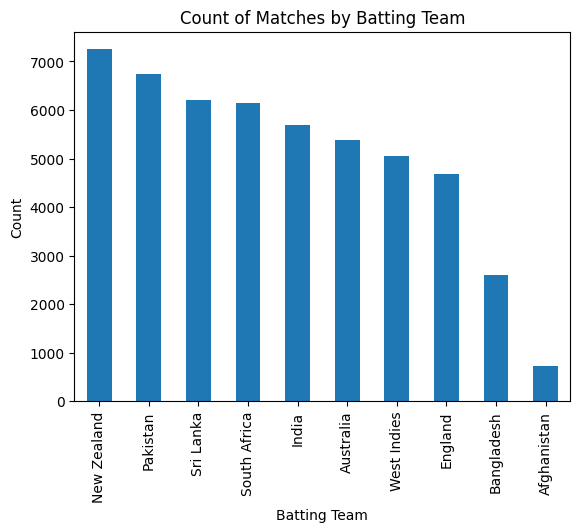

In [40]:
import matplotlib.pyplot as plt

# Example: Bar plot for batting team
final_df['batting_team'].value_counts().plot(kind='bar')
plt.title('Count of Matches by Batting Team')
plt.xlabel('Batting Team')
plt.ylabel('Count')
plt.show()


In [41]:
X = final_df.drop(columns=['runs_x'])
y = final_df['runs_x']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [42]:
X_train

,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five
23203,Pakistan,Sri Lanka,Colombo,126,29,6,8.307692,49.0
25109,England,South Africa,Barbados,43,93,9,9.555556,43.0
36567,Sri Lanka,Australia,Melbourne,99,33,7,6.827586,43.0
43985,Pakistan,Bangladesh,Mirpur,32,83,10,5.189189,28.0
38500,West Indies,New Zealand,Wellington,37,85,8,6.342857,35.0
...,...,...,...,...,...,...,...,...
44404,Australia,South Africa,Durban,108,38,4,7.902439,29.0
38885,New Zealand,Sri Lanka,Pallekele,52,70,7,6.240000,34.0
31525,England,Afghanistan,Colombo,56,76,9,7.636364,51.0
28051,Pakistan,South Africa,Abu Dhabi,29,88,7,5.437500,29.0


In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error

In [44]:
trf = ColumnTransformer([
    ('trf', OneHotEncoder(sparse_output=False, drop='first'), ['batting_team', 'bowling_team', 'city'])
], remainder='passthrough')

In [45]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',StandardScaler()),
    ('step3',XGBRegressor(n_estimators=1000,learning_rate=0.2,max_depth=12,random_state=1))
])

In [46]:
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.9633214183180726
2.410989678646005


In [47]:
pickle.dump(pipe,open('pipe.pkl','wb'))

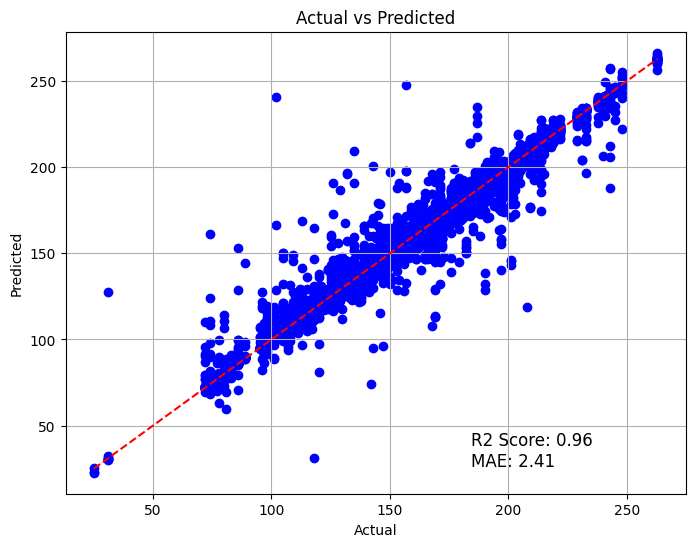

In [48]:
import matplotlib.pyplot as plt
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.text(0.7*np.max(y_test), 0.1*np.max(y_test), f'R2 Score: {r2:.2f}\nMAE: {mae:.2f}', fontsize=12)
plt.grid(True)
plt.show()